In [18]:
!pip install transformers
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline
import matplotlib.ticker as mticker

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [20]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [25]:
data = pd.read_csv('/content/drive/MyDrive/cnbc_final.csv', encoding='unicode_escape')

In [26]:
data

,date,title,content
0,2013/9/5,High-tech tailgating gadgets,The techy tailgater\n\nImage source: David Ell...
1,2013/9/6,Hot new gadgets and gizmos from the IFA innova...,Hot new releases from IFA 2013 gadget show\n\n...
2,2013/9/9,Amazon doesn't plan to launch a free smartphone,Amazon.com said Sunday it doesn't plan to ente...
3,2013/9/9,Morning six-pack: What we're reading Monday,"Happy Monday. Seems this ""six-pack"" concept is..."
4,2013/9/9,"Early movers: YUM, DAL, GSK, VOD, SFD, AMZN & ...",GlaxoSmithKline - Glaxo is selling two drink b...
...,...,...,...
29346,2022/11/23,CNBC Stock World Cup: Nintendo vs. Visa ??who ...,Share Share Article via Facebook Share Article...
29347,2022/11/24,CEO of $4.5 billion tech firm slams his peers ...,"HELSINKI, Finland ??The boss of European digit..."
29348,2022/11/24,CEO of $4.5 billion tech firm slams his peers ...,"HELSINKI, Finland ??The boss of European digit..."
29349,2022/11/24,CNBC Stock World Cup: SoftBank vs. BHP ??who w...,Share Share Article via Facebook Share Article...


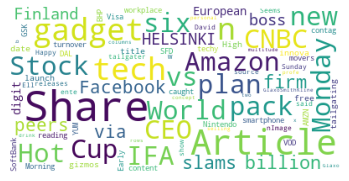

In [27]:
def get_wordcloud(data):
    wordcloud = WordCloud(max_font_size=50, background_color="white").generate(str(data))
    return wordcloud

a = get_wordcloud(data)
plt.imshow(a)
plt.axis('off')
plt.show()

In [ ]:
# import re
# def process(data):
#   return re.sub("[0-9'!#$%&\()*+-/;:<=>?@)", "", data)

In [29]:
news_label_and_scores=classifier(list(data['title']))
news_label_and_scores

[{'label': 'neutral', 'score': 0.9135127067565918},
 {'label': 'neutral', 'score': 0.5598525404930115},
 {'label': 'neutral', 'score': 0.9524676203727722},
 {'label': 'neutral', 'score': 0.9290379881858826},
 {'label': 'neutral', 'score': 0.9461591243743896},
 {'label': 'neutral', 'score': 0.8927240967750549},
 {'label': 'neutral', 'score': 0.9136593341827393},
 {'label': 'negative', 'score': 0.5076669454574585},
 {'label': 'negative', 'score': 0.4543618857860565},
 {'label': 'neutral', 'score': 0.9136593341827393},
 {'label': 'negative', 'score': 0.5076669454574585},
 {'label': 'negative', 'score': 0.4543618857860565},
 {'label': 'neutral', 'score': 0.890217661857605},
 {'label': 'neutral', 'score': 0.6797547936439514},
 {'label': 'negative', 'score': 0.6282601356506348},
 {'label': 'neutral', 'score': 0.9098779559135437},
 {'label': 'neutral', 'score': 0.8949977159500122},
 {'label': 'neutral', 'score': 0.9447575211524963},
 {'label': 'positive', 'score': 0.6489298939704895},
 {'labe

In [30]:
labels=[pred['label'] for pred in news_label_and_scores]
scores=[pred['score'] for pred in news_label_and_scores]
data['labels'] = labels
data['scores'] = scores

In [31]:
data

,date,title,content,labels,scores
0,2013/9/5,High-tech tailgating gadgets,The techy tailgater\n\nImage source: David Ell...,neutral,0.913513
1,2013/9/6,Hot new gadgets and gizmos from the IFA innova...,Hot new releases from IFA 2013 gadget show\n\n...,neutral,0.559853
2,2013/9/9,Amazon doesn't plan to launch a free smartphone,Amazon.com said Sunday it doesn't plan to ente...,neutral,0.952468
3,2013/9/9,Morning six-pack: What we're reading Monday,"Happy Monday. Seems this ""six-pack"" concept is...",neutral,0.929038
4,2013/9/9,"Early movers: YUM, DAL, GSK, VOD, SFD, AMZN & ...",GlaxoSmithKline - Glaxo is selling two drink b...,neutral,0.946159
...,...,...,...,...,...
29346,2022/11/23,CNBC Stock World Cup: Nintendo vs. Visa ??who ...,Share Share Article via Facebook Share Article...,neutral,0.878012
29347,2022/11/24,CEO of $4.5 billion tech firm slams his peers ...,"HELSINKI, Finland ??The boss of European digit...",negative,0.964641
29348,2022/11/24,CEO of $4.5 billion tech firm slams his peers ...,"HELSINKI, Finland ??The boss of European digit...",negative,0.964641
29349,2022/11/24,CNBC Stock World Cup: SoftBank vs. BHP ??who w...,Share Share Article via Facebook Share Article...,neutral,0.854790


In [32]:
ssuumm = data.groupby(['date'])['scores'].agg('median')

In [33]:
dataframes = pd.DataFrame({
              'Sentiment_Mean': data.groupby(['date'])['scores'].agg('mean'),
              'Sentiment_SD': data.groupby(['date'])['scores'].agg('std'),
              'Sentiment_Min': data.groupby(['date'])['scores'].agg('min'),
              'Sentiment_Max': data.groupby(['date'])['scores'].agg('max'),
              'Sentiment_Median': data.groupby(['date'])['scores'].agg('median')
              }, index = ssuumm.index)

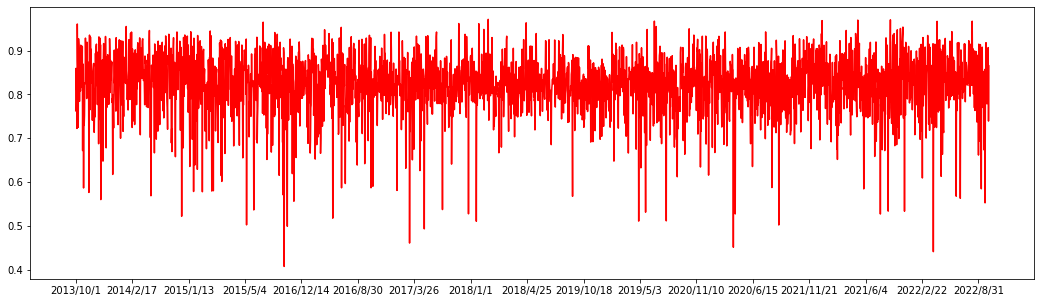

In [34]:
fig = plt.figure(figsize= (18,5))
ax = fig.add_subplot()
ax.xaxis.set_major_locator(mticker.MultipleLocator(180))
ax.plot(dataframes['Sentiment_Mean'].index, dataframes['Sentiment_Mean'],color = 'red', label = 'Real', markerfacecolor = 'red', markersize = 6)

In [35]:
from google.colab import files
dataframes.to_csv('scores_cnbc.csv')
files.download('scores_cnbc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>